In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [60]:
train = pd.read_csv("../../data/raw/train_2.csv")
test = pd.read_csv("../../data/raw/test_2.csv")

In [61]:
train_x = train.drop(['SalePrice'], axis=1)
train_y = train['SalePrice']

In [62]:
# # 行列の標準化
train_x = train_x.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
test = test.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [63]:
for i in test.columns:
    if test[i].count() != 1459:
        print(i)

Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
Electrical_Mix
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
HouseStyle_2.5Fin
MiscFeature_TenC
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll


In [64]:
drop_columns = [
'Condition2_RRAe',
'Condition2_RRAn',
'Condition2_RRNn',
'Electrical_Mix',
'Exterior1st_ImStucc',
'Exterior1st_Stone',
'Exterior2nd_Other',
'Heating_Floor',
'Heating_OthW',
'HouseStyle_2.5Fin',
'MiscFeature_TenC',
'RoofMatl_Membran',
'RoofMatl_Metal',
'RoofMatl_Roll']
train_x = train_x.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [65]:
from sklearn.decomposition import PCA

#主成分分析の実行
pca = PCA(n_components=60)
pca.fit(train_x)
# データを主成分空間に写像
feature_train = pca.transform(train_x)
feature_test = pca.transform(test)

In [66]:
# 主成分得点
train_3 = pd.DataFrame(feature_train, columns=["PC{}".format(x + 1) for x in range(60)])
test_3 = pd.DataFrame(feature_test, columns=["PC{}".format(x + 1) for x in range(60)])

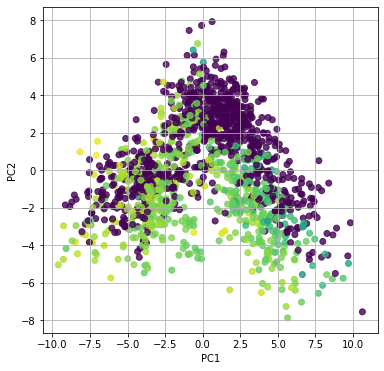

In [67]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature_train[:, 0], feature_train[:, 1], alpha=0.8, c=list(train_x.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [68]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(60)])

,0
PC1,0.068909
PC2,0.034417
PC3,0.031083
PC4,0.022782
PC5,0.019644
PC6,0.018742
PC7,0.017153
PC8,0.016578
PC9,0.015932
PC10,0.014640


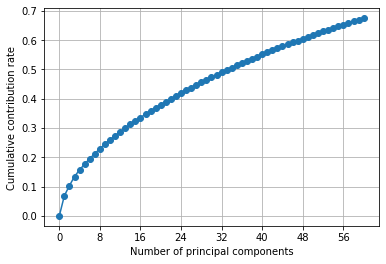

In [69]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

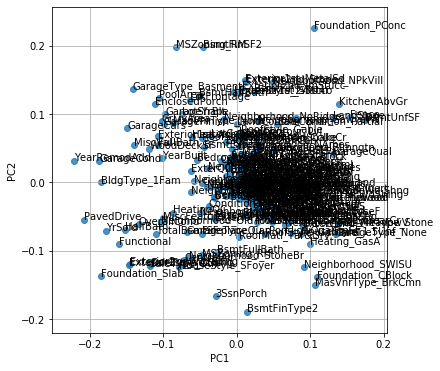

In [70]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], train_x.columns[1:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [73]:
train_3['SalePrice'] = train_y
train_3.to_csv("../../data/raw/train_3.csv", index=False)
test_3.to_csv("../../data/raw/test_3.csv", index=False)    

In [72]:
train_3.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55',
       'PC56', 'PC57', 'PC58', 'PC59', 'PC60'],
      dtype='object')